In [187]:
import pandas as pd
import numpy as np
import json
import re

#Plotting
import matplotlib.pyplot as plt
import FCPython 

#Statistical fitting of models
import statsmodels.api as sm
import statsmodels.formula.api as smf

import os
import glob

In [188]:
df = pd.read_csv('matches_xG.csv', index_col=0)
df.head()

,matchId,label,numbGoals,goals_home,goals_away,team_home,team_away,id_home,id_away,xG_home,shots_home,xG_away,shots_away
0,2517036,"Bayern München - Stuttgart, 1 - 4",5,1,4,Bayern München,Stuttgart,2444,2445,1.407508,15.0,1.258437,7.0
1,2517037,"Hoffenheim - Borussia Dortmund, 3 - 1",4,3,1,Hoffenheim,Borussia Dortmund,2482,2447,1.470969,11.0,0.947046,10.0
2,2517038,"Hertha BSC - RB Leipzig, 2 - 6",8,2,6,Hertha BSC,RB Leipzig,2457,2975,1.330271,8.0,1.256753,17.0
3,2517039,"Freiburg - Augsburg, 2 - 0",2,2,0,Freiburg,Augsburg,2453,2481,1.307470,11.0,0.180677,4.0
4,2517040,"Schalke 04 - Eintracht Frankfurt, 1 - 0",1,1,0,Schalke 04,Eintracht Frankfurt,2449,2462,0.920409,11.0,0.391432,5.0


In [189]:
df['xGps_home'] = df['xG_home']/df['shots_home'] #xG per shot for home and away team
df['xGps_away'] = df['xG_away']/df['shots_away']
df['xGps_home']

0      0.093834
1      0.133724
2      0.166284
3      0.118861
4      0.083674
         ...   
301    0.049747
302    0.075814
303    0.081269
304    0.060779
305    0.171746
Name: xGps_home, Length: 306, dtype: float64

In [190]:
test_xgpshome = [df['xGps_home'][0],df['shots_home'][0]]
test_xgpsaway = [df['xGps_away'][0],df['shots_away'][0]]

# simuliere über np.binomial, wieviele Schüsse bei gegebener Anzahl und Torwahrscheinlichkeit pro Schuss den Weg ins Tor finden 

test_xg = np.random.binomial(test_xgpshome[1],test_xgpshome[0])
test2_xg = np.random.binomial(test_xgpsaway[1], test_xgpsaway[0])
print(test_xg)
print(test2_xg)

1
0


In [191]:
def match_sim(home,away):
    home_xG = np.random.binomial(home[1],home[0])
    away_xG = np.random.binomial(away[1],away[0])
    if home_xG>away_xG:
        points_home = 3
        points_away = 0
    elif away_xG>home_xG:
        points_away=3
        points_home=0
    else:
        points_away=1
        points_home=1
    return [points_home,points_away]

In [192]:
def xP(home,away,sm):
    home_result = []
    away_result = []
    for i in np.arange(sm):
        sm_result = match_sim(home,away)
        #print(sm_result[0])
        home_result.append(sm_result[0])
        away_result.append(sm_result[1])
    #print(home_result)
    xP_home = (sum(home_result))/sm
    xP_away = (sum(away_result))/sm
    return [xP_home,xP_away]

In [193]:
xP(test_xgpshome,test_xgpsaway,10000)

[1.47, 1.2693]

In [194]:
xP_home = []
xP_away = []
for i,j in df.iterrows():
    xgps_home=[j['xGps_home'],j['shots_home']]
    xgps_away=[j['xGps_away'],j['shots_away']]
    xP_match = xP(xgps_home,xgps_away,100000)
    xP_home.append(xP_match[0])
    xP_away.append(xP_match[1])
    
df['xP_home']=xP_home
df['xP_away']=xP_away

In [195]:
df.head()

,matchId,label,numbGoals,goals_home,goals_away,team_home,team_away,id_home,id_away,xG_home,shots_home,xG_away,shots_away,xGps_home,xGps_away,xP_home,xP_away
0,2517036,"Bayern München - Stuttgart, 1 - 4",5,1,4,Bayern München,Stuttgart,2444,2445,1.407508,15.0,1.258437,7.0,0.093834,0.179777,1.46356,1.26673
1,2517037,"Hoffenheim - Borussia Dortmund, 3 - 1",4,3,1,Hoffenheim,Borussia Dortmund,2482,2447,1.470969,11.0,0.947046,10.0,0.133724,0.094705,1.76151,0.96936
2,2517038,"Hertha BSC - RB Leipzig, 2 - 6",8,2,6,Hertha BSC,RB Leipzig,2457,2975,1.330271,8.0,1.256753,17.0,0.166284,0.073927,1.43949,1.28760
3,2517039,"Freiburg - Augsburg, 2 - 0",2,2,0,Freiburg,Augsburg,2453,2481,1.307470,11.0,0.180677,4.0,0.118861,0.045169,2.32494,0.40713
4,2517040,"Schalke 04 - Eintracht Frankfurt, 1 - 0",1,1,0,Schalke 04,Eintracht Frankfurt,2449,2462,0.920409,11.0,0.391432,5.0,0.083674,0.078286,1.81029,0.81825


In [196]:
df.to_csv('matches_xG_wxP.csv')

## Beispiel zur Berechnung


In [218]:
bsp_match = df[df['matchId']==2516739]
bsp_match

,matchId,label,numbGoals,goals_home,goals_away,team_home,team_away,id_home,id_away,xG_home,shots_home,xG_away,shots_away,xGps_home,xGps_away,xP_home,xP_away
305,2516739,"Bayern München - Bayer Leverkusen, 3 - 1",4,3,1,Bayern München,Bayer Leverkusen,2444,2446,2.232692,13.0,2.244308,20.0,0.171746,0.112215,1.39033,1.40347


In [220]:
home_bsp = []
away_bsp = []
goals_away=[]
goals_home=[]
xGps_bsp_match_home = [bsp_match['xGps_home'],bsp_match['shots_home']]
xGps_bsp_match_away = [bsp_match['xGps_away'],bsp_match['shots_away']]
for i in np.arange(100000):
    #sm_result = match_sim(xGps_bsp_match_home,xGps_bsp_match_away)
    home_xG = np.random.binomial(xGps_bsp_match_home[1],xGps_bsp_match_home[0])
    away_xG = np.random.binomial(xGps_bsp_match_away[1],xGps_bsp_match_away[0])
    if home_xG>away_xG:
        points_home = 3
        points_away = 0
    elif away_xG>home_xG:
        points_away=3
        points_home=0
    else:
        points_away=1
        points_home=1
    sm_result = [points_home,points_away]
    
    goals_away.append(away_xG.item())
    goals_home.append(home_xG.item())
    #print(sm_result[0])
    home_bsp.append(sm_result[0])
    away_bsp.append(sm_result[1])
xP_home_bsp = (sum(home_bsp))/100000
xP_away_bsp = (sum(away_bsp))/100000
result_bsp = [xP_home_bsp,xP_away_bsp]
print(result_bsp)

[1.39774, 1.39486]


In [199]:
print(goals_home)
print(home_bsp)

[1, 1, 2, 1, 2, 2, 4, 3, 0, 2, 0, 3, 2, 1, 2, 1, 2, 2, 2, 3, 1, 5, 4, 2, 5, 2, 3, 1, 0, 0, 3, 0, 2, 1, 2, 1, 1, 3, 1, 3, 5, 2, 2, 4, 2, 5, 3, 3, 2, 2, 2, 5, 2, 3, 2, 2, 2, 3, 3, 1, 6, 2, 2, 4, 1, 5, 1, 0, 4, 4, 1, 0, 3, 3, 3, 0, 4, 2, 2, 2, 3, 2, 1, 3, 4, 2, 3, 0, 1, 3, 2, 3, 4, 0, 3, 3, 2, 2, 2, 2, 2, 0, 5, 5, 3, 3, 2, 0, 2, 2, 1, 0, 3, 3, 2, 2, 2, 2, 3, 3, 2, 1, 2, 4, 5, 2, 2, 1, 0, 3, 6, 0, 2, 1, 2, 3, 5, 2, 4, 4, 3, 2, 1, 3, 3, 3, 3, 1, 3, 4, 0, 4, 3, 7, 1, 2, 1, 3, 4, 2, 1, 4, 2, 4, 1, 2, 2, 2, 1, 3, 1, 2, 1, 1, 0, 2, 3, 2, 3, 3, 0, 2, 2, 0, 3, 3, 1, 3, 3, 1, 0, 2, 2, 3, 0, 5, 2, 2, 2, 2, 5, 0, 1, 5, 1, 1, 1, 3, 1, 2, 1, 3, 2, 3, 3, 2, 1, 3, 4, 2, 0, 5, 1, 2, 1, 4, 2, 4, 2, 1, 2, 3, 2, 3, 3, 3, 2, 4, 1, 1, 6, 1, 4, 4, 3, 2, 4, 2, 4, 3, 1, 1, 2, 4, 2, 4, 4, 1, 4, 1, 3, 3, 1, 3, 3, 1, 1, 2, 2, 3, 1, 0, 2, 3, 0, 2, 2, 2, 1, 1, 0, 4, 2, 6, 2, 3, 1, 3, 3, 2, 1, 2, 6, 1, 5, 3, 2, 1, 3, 5, 0, 0, 5, 5, 3, 3, 2, 0, 2, 2, 3, 1, 1, 1, 2, 1, 1, 4, 3, 3, 1, 1, 3, 1, 2, 6, 2, 3, 3, 3, 2, 1, 4, 

In [200]:
print(goals_away)
print(away_bsp)

[2, 3, 1, 1, 1, 3, 0, 2, 5, 1, 3, 2, 3, 3, 2, 5, 2, 1, 2, 0, 4, 4, 2, 4, 2, 7, 5, 0, 3, 1, 1, 2, 2, 2, 2, 2, 1, 4, 2, 2, 2, 3, 4, 2, 3, 2, 2, 2, 3, 1, 4, 0, 3, 2, 0, 1, 4, 4, 1, 1, 3, 3, 2, 1, 1, 2, 1, 3, 5, 3, 1, 1, 4, 2, 0, 1, 2, 1, 5, 2, 4, 3, 4, 4, 2, 1, 3, 1, 5, 2, 4, 0, 2, 3, 2, 4, 1, 1, 0, 2, 6, 1, 2, 2, 2, 0, 6, 4, 0, 3, 2, 3, 1, 3, 1, 3, 1, 5, 1, 2, 4, 0, 0, 1, 2, 1, 3, 1, 2, 2, 2, 1, 2, 6, 1, 1, 3, 1, 1, 2, 0, 1, 2, 2, 2, 2, 3, 4, 1, 5, 2, 1, 4, 2, 2, 3, 3, 3, 3, 1, 4, 5, 3, 1, 3, 4, 2, 2, 4, 1, 4, 1, 5, 1, 3, 4, 3, 3, 3, 1, 3, 3, 1, 6, 0, 3, 0, 3, 0, 2, 4, 5, 2, 1, 2, 3, 2, 2, 3, 4, 1, 4, 4, 4, 1, 4, 4, 2, 4, 4, 3, 2, 0, 2, 3, 2, 2, 2, 5, 1, 1, 1, 4, 0, 3, 0, 6, 3, 4, 2, 5, 4, 5, 1, 3, 2, 2, 2, 1, 4, 2, 3, 1, 2, 2, 4, 2, 0, 0, 3, 5, 5, 3, 2, 4, 0, 3, 2, 4, 3, 2, 2, 1, 1, 4, 2, 3, 3, 3, 4, 4, 1, 2, 3, 2, 4, 0, 1, 4, 3, 3, 2, 1, 2, 2, 1, 2, 1, 1, 2, 3, 2, 2, 2, 2, 4, 2, 1, 1, 2, 2, 1, 1, 1, 3, 1, 2, 4, 6, 6, 1, 0, 1, 1, 0, 2, 3, 1, 1, 1, 0, 2, 1, 1, 2, 1, 1, 3, 1, 5, 1, 1, 1, 

In [221]:
bsp_df = pd.DataFrame({'goals_home':goals_home,'goals_away':goals_away})
bsp_df

,goals_home,goals_away
0,0,3
1,2,0
2,1,2
3,2,4
4,3,5
...,...,...
99995,5,3
99996,2,0
99997,2,2
99998,3,2


array([[<Axes: title={'center': 'goals_home'}>,
        <Axes: title={'center': 'goals_away'}>]], dtype=object)

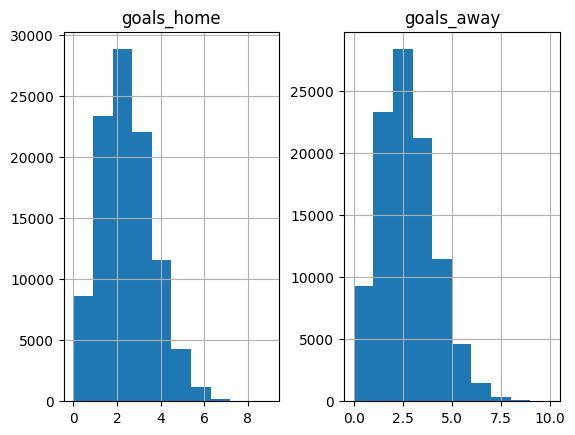

In [222]:
bsp_df.hist()

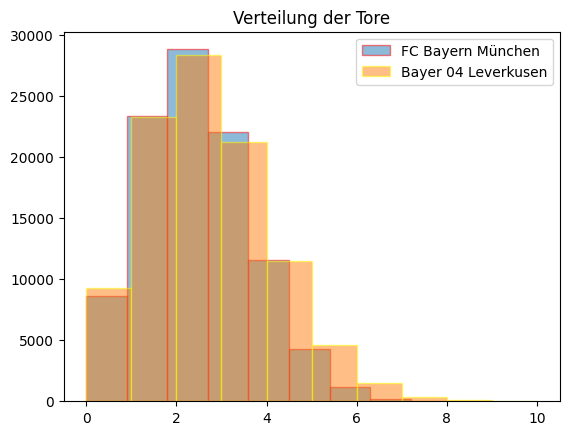

In [223]:
plt.hist(bsp_df['goals_home'], label='FC Bayern München', alpha=.5, edgecolor='red')
plt.hist(bsp_df['goals_away'], label='Bayer 04 Leverkusen',alpha=.5, edgecolor='yellow')
plt.legend()
plt.title('Verteilung der Tore')
plt.show()

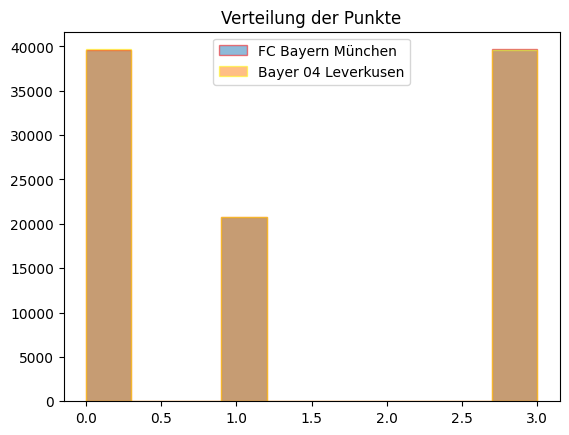

In [224]:
plt.hist(home_bsp, label='FC Bayern München', alpha=.5, edgecolor='red')
plt.hist(away_bsp, label='Bayer 04 Leverkusen',alpha=.5, edgecolor='yellow')
plt.legend()
plt.title('Verteilung der Punkte')
plt.show()

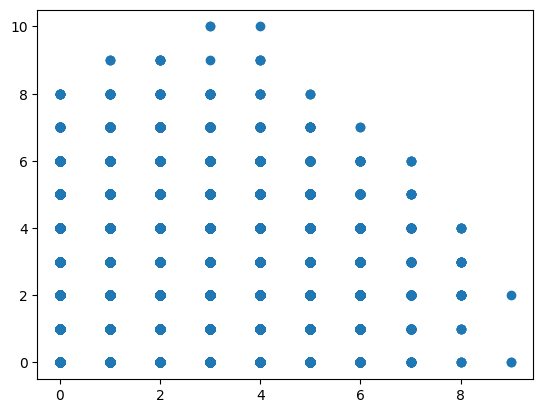

In [225]:
plt.scatter(bsp_df['goals_home'],bsp_df['goals_away'])

In [226]:
bsp_df_away = pd.DataFrame({'goals_away':goals_away, 'points_away':away_bsp})
bsp_df_away = bsp_df_away.sort_values('goals_away')
bsp_df_away = bsp_df_away.reset_index(drop=True)
bsp_df_away

,goals_away,points_away
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
99995,9,3
99996,9,3
99997,10,3
99998,10,3


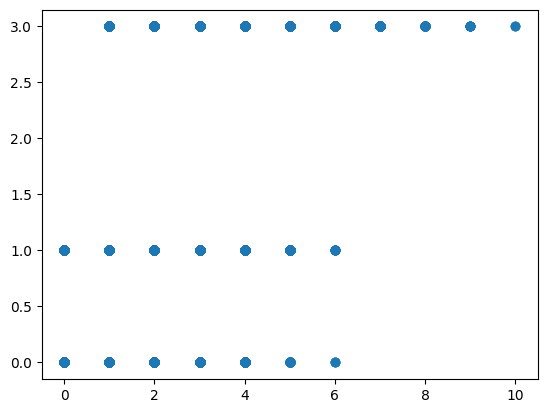

In [227]:
plt.scatter(bsp_df_away['goals_away'], bsp_df_away['points_away'])

array([[<Axes: title={'center': 'goals_away'}>,
        <Axes: title={'center': 'points_away'}>]], dtype=object)

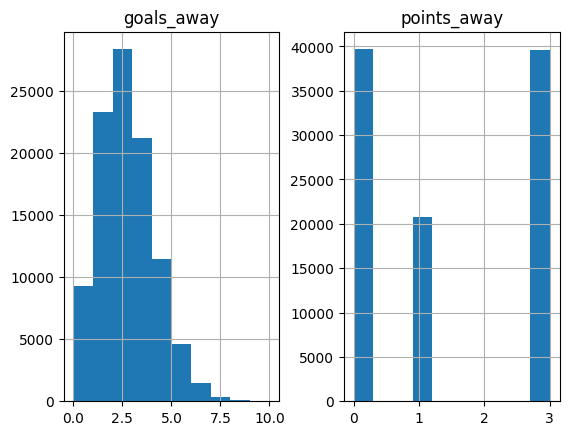

In [228]:
bsp_df_away.hist()

## Bemerkung

Hier ist Folgendes anzumerken: Bei der Berechnung der xP werden hier die xG-Werte der Schüsse gemittelt. Es sollte an sich möglich sein, hier genau dies nicht zu tun, da ja für jeden Schuss die jeweiligen xG-Werte bekannt sind. Dies ist also hier drunter weiter auszuführen. 

In [229]:
df.head()

,matchId,label,numbGoals,goals_home,goals_away,team_home,team_away,id_home,id_away,xG_home,shots_home,xG_away,shots_away,xGps_home,xGps_away,xP_home,xP_away
0,2517036,"Bayern München - Stuttgart, 1 - 4",5,1,4,Bayern München,Stuttgart,2444,2445,1.407508,15.0,1.258437,7.0,0.093834,0.179777,1.46356,1.26673
1,2517037,"Hoffenheim - Borussia Dortmund, 3 - 1",4,3,1,Hoffenheim,Borussia Dortmund,2482,2447,1.470969,11.0,0.947046,10.0,0.133724,0.094705,1.76151,0.96936
2,2517038,"Hertha BSC - RB Leipzig, 2 - 6",8,2,6,Hertha BSC,RB Leipzig,2457,2975,1.330271,8.0,1.256753,17.0,0.166284,0.073927,1.43949,1.28760
3,2517039,"Freiburg - Augsburg, 2 - 0",2,2,0,Freiburg,Augsburg,2453,2481,1.307470,11.0,0.180677,4.0,0.118861,0.045169,2.32494,0.40713
4,2517040,"Schalke 04 - Eintracht Frankfurt, 1 - 0",1,1,0,Schalke 04,Eintracht Frankfurt,2449,2462,0.920409,11.0,0.391432,5.0,0.083674,0.078286,1.81029,0.81825


In [230]:
xG_df = pd.read_csv('xG_full.csv', index_col=0)
xG_df.head()

,Goal,X,Y,C,matchId,teamId,eventSec,Distance,Angle,xG
0,1,6,57,7.0,2500686.0,3799.0,605.975493,7.530106,0.792427,0.343090
1,1,4,43,7.0,2500686.0,3772.0,1568.104834,6.058259,0.898499,0.428836
2,0,16,21,29.0,2500686.0,3772.0,1800.852078,24.724937,0.193428,0.027492
3,0,27,51,1.0,2500686.0,3799.0,2009.537139,27.007823,0.269317,0.024338
4,0,28,59,9.0,2500686.0,3799.0,2072.957133,28.604589,0.249363,0.020760


In [231]:
bsp_shots = xG_df[xG_df['matchId']==2516739]
bsp_shots

,Goal,X,Y,C,matchId,teamId,eventSec,Distance,Angle,xG
13608,0,17,66,16.0,2516739.0,2444.0,247.703507,19.928874,0.313564,0.051505
13609,0,9,66,16.0,2516739.0,2446.0,668.234340,13.753545,0.358613,0.110848
13610,0,12,49,1.0,2516739.0,2446.0,672.925920,12.017591,0.590580,0.172880
13611,0,26,42,8.0,2516739.0,2444.0,949.131592,26.514901,0.269266,0.025423
13612,0,6,66,16.0,2516739.0,2446.0,1203.137020,12.006665,0.324033,0.132578
13613,0,9,73,23.0,2516739.0,2444.0,1375.956746,17.450000,0.222560,0.061541
13614,0,22,60,10.0,2516739.0,2446.0,1403.332397,22.940139,0.304257,0.037164
13615,0,7,37,13.0,2516739.0,2444.0,1594.240338,10.972807,0.446583,0.170243
13616,0,20,57,7.0,2516739.0,2446.0,2209.374008,20.511034,0.345055,0.050097
13617,0,22,63,13.0,2516739.0,2446.0,2469.785203,23.566979,0.288811,0.034307


In [232]:
bsp_shots_home = bsp_shots[bsp_shots['teamId']==2444][['Goal','xG']]
bsp_shots_away = bsp_shots[bsp_shots['teamId']==2446][['Goal','xG']]
bsp_shots_home = bsp_shots_home.sort_values('xG').reset_index(drop=True)
bsp_shots_away = bsp_shots_away.sort_values('xG').reset_index(drop=True)
bsp_shots_home

,Goal,xG
0,0,0.024824
1,0,0.025423
2,0,0.033369
3,0,0.051505
4,0,0.061541
5,0,0.068909
6,0,0.077106
7,0,0.104694
8,0,0.140300
9,1,0.155135


In [258]:
bsp_shots_away

,Goal,xG
0,0,0.028062
1,0,0.029106
2,0,0.032159
3,0,0.034307
4,0,0.035170
5,0,0.035170
6,0,0.037164
7,0,0.050097
8,0,0.050704
9,1,0.072475


In [233]:
sum(np.random.binomial(1,bsp_shots_home['xG']))

3

In [234]:
shots_h_bsp = []
shots_a_bsp = []
goals_shots_a=[]
goals_shots_h=[]
xGps_shots_bsp_h = [bsp_shots_home['xG'],1]
xGps_shots_bsp_a = [bsp_shots_away['xG'],1]
for i in np.arange(100000):
    #sm_result = match_sim(xGps_bsp_match_home,xGps_bsp_match_away)
    home_shots_xG = sum(np.random.binomial(1,xGps_shots_bsp_h[0]))
    away_shots_xG = sum(np.random.binomial(1,xGps_shots_bsp_a[0]))
    if home_shots_xG>away_shots_xG:
        points_home = 3
        points_away = 0
    elif away_shots_xG>home_shots_xG:
        points_away=3
        points_home=0
    else:
        points_away=1
        points_home=1
    sm_result = [points_home,points_away]
    
    goals_shots_a.append(away_shots_xG)
    goals_shots_h.append(home_shots_xG)
    #print(sm_result[0])
    shots_h_bsp.append(sm_result[0])
    shots_a_bsp.append(sm_result[1])
xP_home_bsp = (sum(shots_h_bsp))/100000
xP_away_bsp = (sum(shots_a_bsp))/100000
result_bsp = [xP_home_bsp,xP_away_bsp]
print(result_bsp)

[1.40033, 1.36604]


In [244]:
set(goals_shots_h)

{0, 1, 2, 3, 4, 5, 6, 7, 8}

In [245]:
set(goals_shots_a)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

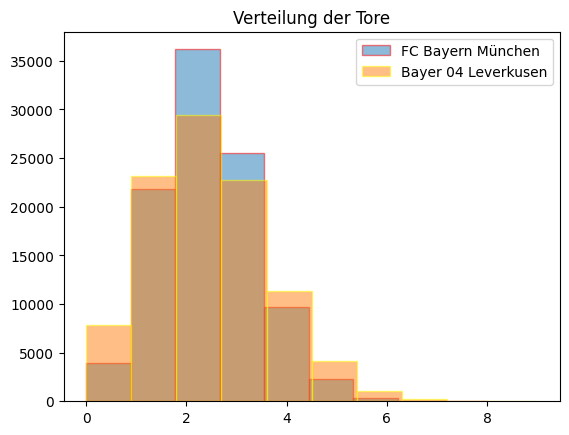

In [243]:
plt.hist(goals_shots_h, bins=9, label='FC Bayern München', alpha=.5, edgecolor='red')
plt.hist(goals_shots_a, bins=10, label='Bayer 04 Leverkusen',alpha=.5, edgecolor='yellow')
plt.legend()
plt.title('Verteilung der Tore')
plt.show()

In [259]:
len(list(filter(lambda p: p==0,goals_shots_h)))

3981

In [260]:
len(list(filter(lambda p: p==0,goals_shots_a)))

7874

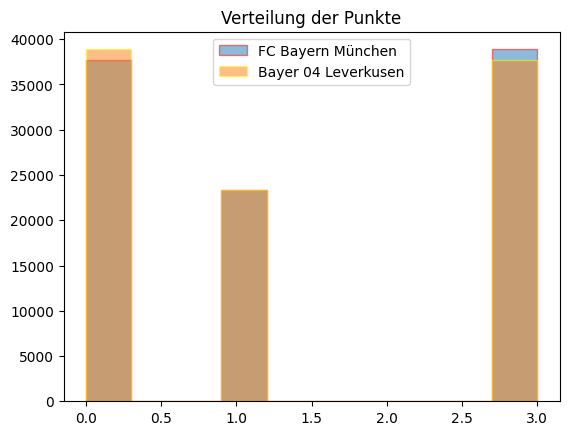

In [236]:
plt.hist(shots_h_bsp, label='FC Bayern München', alpha=.5, edgecolor='red')
plt.hist(shots_a_bsp, label='Bayer 04 Leverkusen',alpha=.5, edgecolor='yellow')
plt.legend()
plt.title('Verteilung der Punkte')
plt.show()

In [254]:
len(list(filter(lambda p: p==3,shots_h_bsp)))

38890

In [255]:
len(list(filter(lambda p: p==3,shots_a_bsp)))

37747

## Iteriere Vorgehen für ganze Saison 

In [261]:
df.head()

,matchId,label,numbGoals,goals_home,goals_away,team_home,team_away,id_home,id_away,xG_home,shots_home,xG_away,shots_away,xGps_home,xGps_away,xP_home,xP_away
0,2517036,"Bayern München - Stuttgart, 1 - 4",5,1,4,Bayern München,Stuttgart,2444,2445,1.407508,15.0,1.258437,7.0,0.093834,0.179777,1.46356,1.26673
1,2517037,"Hoffenheim - Borussia Dortmund, 3 - 1",4,3,1,Hoffenheim,Borussia Dortmund,2482,2447,1.470969,11.0,0.947046,10.0,0.133724,0.094705,1.76151,0.96936
2,2517038,"Hertha BSC - RB Leipzig, 2 - 6",8,2,6,Hertha BSC,RB Leipzig,2457,2975,1.330271,8.0,1.256753,17.0,0.166284,0.073927,1.43949,1.28760
3,2517039,"Freiburg - Augsburg, 2 - 0",2,2,0,Freiburg,Augsburg,2453,2481,1.307470,11.0,0.180677,4.0,0.118861,0.045169,2.32494,0.40713
4,2517040,"Schalke 04 - Eintracht Frankfurt, 1 - 0",1,1,0,Schalke 04,Eintracht Frankfurt,2449,2462,0.920409,11.0,0.391432,5.0,0.083674,0.078286,1.81029,0.81825


In [262]:
xG_df.head()

,Goal,X,Y,C,matchId,teamId,eventSec,Distance,Angle,xG
0,1,6,57,7.0,2500686.0,3799.0,605.975493,7.530106,0.792427,0.343090
1,1,4,43,7.0,2500686.0,3772.0,1568.104834,6.058259,0.898499,0.428836
2,0,16,21,29.0,2500686.0,3772.0,1800.852078,24.724937,0.193428,0.027492
3,0,27,51,1.0,2500686.0,3799.0,2009.537139,27.007823,0.269317,0.024338
4,0,28,59,9.0,2500686.0,3799.0,2072.957133,28.604589,0.249363,0.020760


In [268]:
def match_sim_alt(home,away):
    home_xG = sum(np.random.binomial(home[1],home[0]))
    away_xG = sum(np.random.binomial(away[1],away[0]))
    if home_xG>away_xG:
        points_home = 3
        points_away = 0
    elif away_xG>home_xG:
        points_away=3
        points_home=0
    else:
        points_away=1
        points_home=1
    return [points_home,points_away]

In [269]:
def xP_alt(home,away,sm):
    home_result = []
    away_result = []
    for i in np.arange(sm):
        sm_result = match_sim_alt(home,away)
        #print(sm_result[0])
        home_result.append(sm_result[0])
        away_result.append(sm_result[1])
    #print(home_result)
    xP_home = (sum(home_result))/sm
    xP_away = (sum(away_result))/sm
    return [xP_home,xP_away]

In [270]:
xP_home = []
xP_away = []
for i,j in df.iterrows():
    shots_match = xG_df[xG_df['matchId']==j['matchId']][['teamId','xG']]
    shots_h = shots_match[shots_match['teamId']==j['id_home']][['xG']].reset_index(drop=True)
    shots_a = shots_match[shots_match['teamId']==j['id_away']][['xG']].reset_index(drop=True)
    #print(shots_h)
    xgps_home=[shots_h['xG'],1]
    xgps_away=[shots_a['xG'],1]
    xP_match = xP_alt(xgps_home,xgps_away,100000)
    xP_home.append(xP_match[0])
    xP_away.append(xP_match[1])
    
df['xP_shots_home']=xP_home
df['xP_shots_away']=xP_away

In [271]:
df.head()

,matchId,label,numbGoals,goals_home,goals_away,team_home,team_away,id_home,id_away,xG_home,shots_home,xG_away,shots_away,xGps_home,xGps_away,xP_home,xP_away,xP_shots_home,xP_shots_away
0,2517036,"Bayern München - Stuttgart, 1 - 4",5,1,4,Bayern München,Stuttgart,2444,2445,1.407508,15.0,1.258437,7.0,0.093834,0.179777,1.46356,1.26673,1.43614,1.27474
1,2517037,"Hoffenheim - Borussia Dortmund, 3 - 1",4,3,1,Hoffenheim,Borussia Dortmund,2482,2447,1.470969,11.0,0.947046,10.0,0.133724,0.094705,1.76151,0.96936,1.76933,0.95129
2,2517038,"Hertha BSC - RB Leipzig, 2 - 6",8,2,6,Hertha BSC,RB Leipzig,2457,2975,1.330271,8.0,1.256753,17.0,0.166284,0.073927,1.43949,1.28760,1.44182,1.28345
3,2517039,"Freiburg - Augsburg, 2 - 0",2,2,0,Freiburg,Augsburg,2453,2481,1.307470,11.0,0.180677,4.0,0.118861,0.045169,2.32494,0.40713,2.34549,0.39366
4,2517040,"Schalke 04 - Eintracht Frankfurt, 1 - 0",1,1,0,Schalke 04,Eintracht Frankfurt,2449,2462,0.920409,11.0,0.391432,5.0,0.083674,0.078286,1.81029,0.81825,1.81181,0.81644


In [272]:
df.to_csv('matches_xG_wxPs.csv')

## Tabelle kreieren 

In [312]:
tab = pd.read_csv('tabelle_ordroundxG.csv', index_col=0)
tab = tab[['team_home']]
tab.columns=['Team']
tab['xP']=0
tab['xPs'] = 0
tab

,Team,xP,xPs
0,Bayern München,0,0
1,Borussia Dortmund,0,0
2,Bayer Leverkusen,0,0
3,RB Leipzig,0,0
4,Eintracht Frankfurt,0,0
5,Hoffenheim,0,0
6,Schalke 04,0,0
7,Augsburg,0,0
8,Hertha BSC,0,0
9,Stuttgart,0,0


In [313]:
df_tab = df[['team_home', 'team_away', 'xP_home', 'xP_away', 'xP_shots_home', 'xP_shots_away']]
df_tab

,team_home,team_away,xP_home,xP_away,xP_shots_home,xP_shots_away
0,Bayern München,Stuttgart,1.46356,1.26673,1.43614,1.27474
1,Hoffenheim,Borussia Dortmund,1.76151,0.96936,1.76933,0.95129
2,Hertha BSC,RB Leipzig,1.43949,1.28760,1.44182,1.28345
3,Freiburg,Augsburg,2.32494,0.40713,2.34549,0.39366
4,Schalke 04,Eintracht Frankfurt,1.81029,0.81825,1.81181,0.81644
...,...,...,...,...,...,...
301,Hertha BSC,Stuttgart,0.87289,1.75732,0.85707,1.77918
302,Hamburger SV,Augsburg,1.28482,1.39303,1.27854,1.39683
303,Mainz 05,Hannover 96,1.76129,0.90296,1.77006,0.89424
304,Wolfsburg,Borussia Dortmund,0.67102,2.02966,0.64512,2.06031


In [314]:
for i,j in df_tab.iterrows():
    tab.loc[tab[tab['Team']==j['team_home']].index[0],"xP"] += j['xP_home']
    tab.loc[tab[tab['Team']==j['team_home']].index[0],"xPs"] += j['xP_shots_home']
    tab.loc[tab[tab['Team']==j['team_away']].index[0],"xP"] += j['xP_away']
    tab.loc[tab[tab['Team']==j['team_away']].index[0],"xPs"] += j['xP_away']

tab['ordroundxG']=tab.index+1

In [315]:
tab = tab.sort_values('xPs', ascending=False).reset_index(drop=True)
tab['Platz_xPs'] = tab.index+1
tab = tab.sort_values('xP', ascending=False).reset_index(drop=True)
tab['Platz_xP'] = tab.index+1
tab

,Team,xP,xPs,ordroundxG,Platz_xPs,Platz_xP
0,Bayern München,70.07960,70.76719,1,1,1
1,Bayer Leverkusen,59.87762,60.52509,3,2,2
2,Borussia Dortmund,59.66371,60.34460,2,3,3
3,RB Leipzig,52.27706,52.64611,4,4,4
4,Hoffenheim,52.00451,52.14093,6,5,5
5,Eintracht Frankfurt,49.74499,50.08653,5,6,6
6,Schalke 04,48.15559,48.59189,7,7,7
7,Stuttgart,45.03200,45.31462,10,8,8
8,Hannover 96,44.91539,45.16006,11,9,9
9,Augsburg,44.63867,44.68537,8,10,10


In [316]:
testtab = pd.read_csv('Test_17_17_tab.csv', sep=';')
testtab = testtab[['Platz', 'Mannschaft', 'Punkte']]
testtab

,Platz,Mannschaft,Punkte
0,1.0,FC Bayern München,84
1,2.0,FC Schalke 04,63
2,3.0,1899 Hoffenheim,55
3,4.0,Borussia Dortmund,55
4,5.0,Bayer 04 Leverkusen,55
5,6.0,RB Leipzig,53
6,7.0,VfB Stuttgart,51
7,8.0,Eintracht Frankfurt,49
8,9.0,Borussia Mönchengladbach,47
9,10.0,Hertha BSC,43


In [317]:
testtab['Other'] = tab['Team']
testtab

,Platz,Mannschaft,Punkte,Other
0,1.0,FC Bayern München,84,Bayern München
1,2.0,FC Schalke 04,63,Bayer Leverkusen
2,3.0,1899 Hoffenheim,55,Borussia Dortmund
3,4.0,Borussia Dortmund,55,RB Leipzig
4,5.0,Bayer 04 Leverkusen,55,Hoffenheim
5,6.0,RB Leipzig,53,Eintracht Frankfurt
6,7.0,VfB Stuttgart,51,Schalke 04
7,8.0,Eintracht Frankfurt,49,Stuttgart
8,9.0,Borussia Mönchengladbach,47,Hannover 96
9,10.0,Hertha BSC,43,Augsburg


In [318]:
tab['Platz'] = [1,5,4,6,3,8,2,7,13,12,10,9,11,15,14,17,16,18]
tab = tab.sort_values('Platz')
tab = tab.reset_index(drop=True)
tab['Punkte'] = testtab['Punkte']
tab

,Team,xP,xPs,ordroundxG,Platz_xPs,Platz_xP,Platz,Punkte
0,Bayern München,70.07960,70.76719,1,1,1,1,84
1,Schalke 04,48.15559,48.59189,7,7,7,2,63
2,Hoffenheim,52.00451,52.14093,6,5,5,3,55
3,Borussia Dortmund,59.66371,60.34460,2,3,3,4,55
4,Bayer Leverkusen,59.87762,60.52509,3,2,2,5,55
5,RB Leipzig,52.27706,52.64611,4,4,4,6,53
6,Stuttgart,45.03200,45.31462,10,8,8,7,51
7,Eintracht Frankfurt,49.74499,50.08653,5,6,6,8,49
8,Borussia M'gladbach,43.81852,43.85206,12,12,12,9,47
9,Hertha BSC,44.44437,44.52638,9,11,11,10,43


In [319]:
tab.to_csv('tabelle_w_xPs.csv')

In [320]:
abs(tab['xP']-tab['xPs'])

0     0.68759
1     0.43630
2     0.13642
3     0.68089
4     0.64747
5     0.36905
6     0.28262
7     0.34154
8     0.03354
9     0.08201
10    0.08273
11    0.04670
12    0.24467
13    0.44865
14    0.56884
15    0.05534
16    0.07819
17    0.40147
dtype: float64